In [2]:
from sklearn.datasets import make_moons
x,y=make_moons()

In [3]:
y

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [10]:
import pandas as pd
data = pd.DataFrame(x)
data.columns = ['f1','f2']
data['class'] = y
data

,f1,f2,class
0,0.099031,0.066116,1
1,1.981559,0.308841,1
2,0.481607,-0.355143,1
3,0.518393,0.855143,0
4,0.903977,-0.495379,1
...,...,...,...
95,1.718349,-0.195683,1
96,-0.761446,0.648228,0
97,0.002055,0.435930,1
98,0.159600,0.987182,0


<AxesSubplot:xlabel='f1', ylabel='f2'>

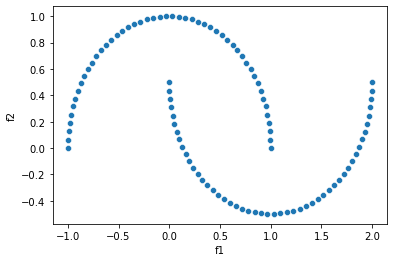

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = data.f1,y = data.f2)

# Using Kmeans

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=600)
kmeans.fit(data.iloc[:,:2])

KMeans(max_iter=600, n_clusters=2)

In [17]:
kmeans_pred = kmeans.predict(data.iloc[:,:2])

In [18]:
data['class_pr'] = kmeans_pred
data

,f1,f2,class,class_pr
0,0.099031,0.066116,1,0
1,1.981559,0.308841,1,1
2,0.481607,-0.355143,1,1
3,0.518393,0.855143,0,0
4,0.903977,-0.495379,1,1
...,...,...,...,...
95,1.718349,-0.195683,1,1
96,-0.761446,0.648228,0,0
97,0.002055,0.435930,1,0
98,0.159600,0.987182,0,0


<AxesSubplot:xlabel='f1', ylabel='f2'>

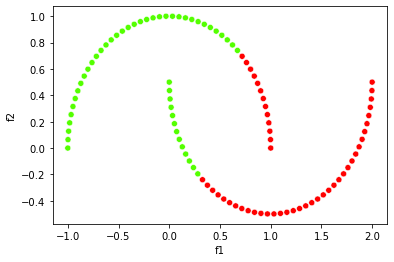

In [23]:
sns.scatterplot(x = data.f1,y = data.f2,c = data.class_pr,cmap = plt.cm.prism_r)

# Using Heirararchial cluster

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [29]:
data2 = data.drop(['class','class_pr'],axis = 1)
data2

,f1,f2
0,0.099031,0.066116
1,1.981559,0.308841
2,0.481607,-0.355143
3,0.518393,0.855143
4,0.903977,-0.495379
...,...,...
95,1.718349,-0.195683
96,-0.761446,0.648228
97,0.002055,0.435930
98,0.159600,0.987182


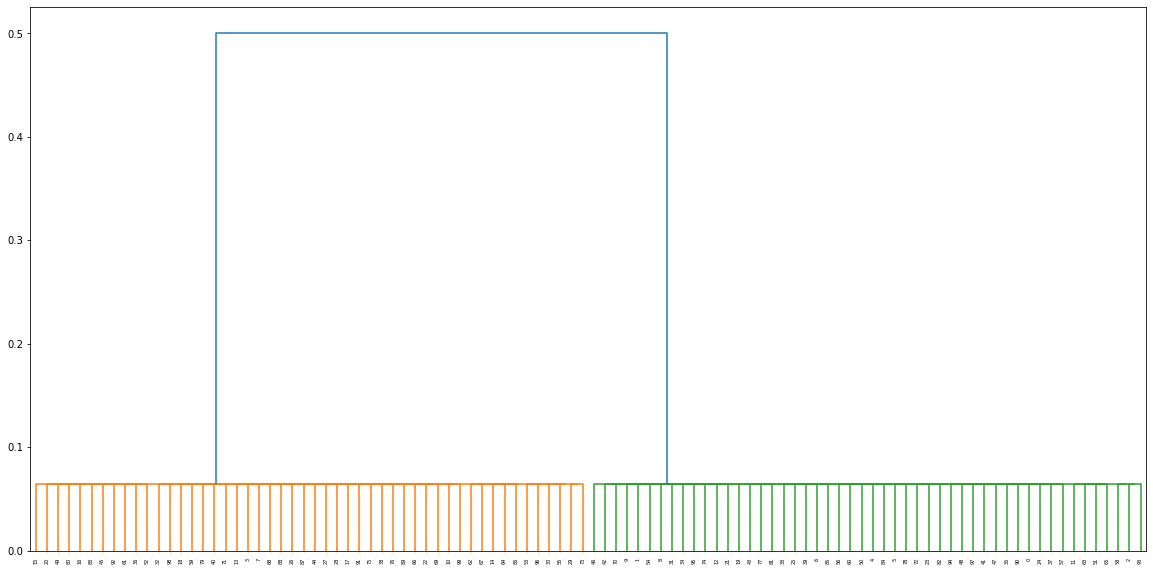

In [32]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(data2,method='single'))

In [37]:
cluster=AgglomerativeClustering(n_clusters=2,linkage= 'single')
class_pr = cluster.fit_predict(data.iloc[:,:2])

In [38]:
data2['class_pr']  =class_pr

<AxesSubplot:xlabel='f1', ylabel='f2'>

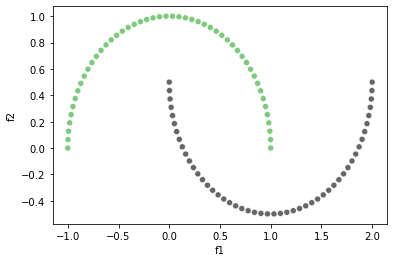

In [43]:
sns.scatterplot(x = data2.f1,y=data2.f2,c = data2.class_pr,cmap = plt.cm.Accent_r)

# Using DBSCAN

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(min_samples=2,eps = 0.2)

In [49]:
class_pr = db.fit_predict(data.iloc[:,:2])

In [50]:
data3 = data.copy()

In [51]:
data3['class_pr'] = class_pr

<AxesSubplot:xlabel='f1', ylabel='f2'>

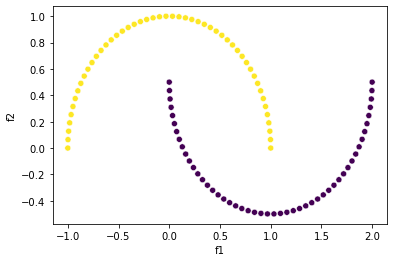

In [52]:
sns.scatterplot(x = data3.f1,y = data3.f2,c = class_pr)